In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
import seaborn as sns

In [ ]:
red = pd.read_excel('../Data/winequality-red.xlsx', skiprows=1)
white = pd.read_excel('../Data/winequality-white.xlsx', skiprows=1)

In [ ]:
red.shape

In [ ]:
red.sample(10)

In [ ]:
red.head()

In [ ]:
#check for missing values
red.isnull().sum()

In [ ]:
#check for duplicates
red.duplicated().sum()

In [ ]:
red.drop_duplicates()

In [ ]:
red.shape

In [ ]:
red.columns

In [ ]:
red.dtypes

In [ ]:
white.shape

In [ ]:
white.sample(10)

In [ ]:
white.head()

In [ ]:
white.isnull().sum()

In [ ]:
white.duplicated().sum()

In [ ]:
white.drop_duplicates()

In [ ]:
white.shape

In [ ]:
white.columns

In [ ]:
white.dtypes

In [ ]:
red["type"] = "red"
white["type"] = "white"

wine_df = pd.concat([red, white], ignore_index=True)

In [ ]:
wine_df["type"] = wine_df["type"].map({"red": 0, "white": 1})

In [ ]:
wine_df_clean = wine_df.drop_duplicates()
wine_df_clean.duplicated().sum()

In [ ]:
wine_df_clean.shape

In [ ]:
wine_df_clean.sample(10)

In [ ]:
#step 6
wine_df_clean.describe()

In [ ]:
wine_df_clean.skew()

make a diagram (histogram (sns.histplot), box plot (sns.boxplot), Pair plots(sns.pairplot))
What is skewness?
A perfectly normal distribution (like the bell curve) has skewness = 0.

Skewness > 0 → The distribution is right-skewed (long tail on the right)

Skewness < 0 → The distribution is left-skewed (long tail on the left)

📈 Visuals of skewness:
Type	Shape	Skewness
Normal	Symmetrical bell curve	0
Right-skewed	Long tail to the right	> 0
Left-skewed	Long tail to the left	< 0

In [ ]:
#code block for diagrams

In [ ]:
#1. What ingredients make wine sweeter?

#This shows which features tend to increase as sugar increases.
wine_df_clean.corr()["residual sugar"].sort_values(ascending=False)

In [ ]:
#Visualize top features vs residual sugar

sns.pairplot(wine_df, vars=["residual sugar", "alcohol", "density", "citric acid", "chlorides"], hue="type")
plt.show()

Top-left (residual sugar distribution)
Interpretation:

Both red and white wines mostly have low residual sugar (left-skewed distribution).

But white wines (🟠) have a much broader spread — they can have much higher sugar content than red wines.

🧠 Conclusion: White wines are more likely to be sweet than red wines.

Top-left 2 (alcohol distribution)
X-axis: alcohol

Y-axis: count or density

Interpretation:

Red wine (🔵) has a more concentrated alcohol range, often centered around 10–11%

White wine (🟠) shows higher variance in alcohol content, and tends to be a bit stronger overall

🧠 Conclusion: White wine may contain slightly more alcohol on average.



In [ ]:
#2. Are there patterns between pH and quality?

#This explores whether acidity (pH) affects perceived wine quality.
sns.scatterplot(data=wine_df_clean, x="pH", y="quality", hue="type")
plt.title("pH vs. Quality")
plt.show()


If the correlation is:

Negative → higher acidity (lower pH) is associated with higher quality

Positive → higher pH might indicate better quality (less acidic)

In [ ]:
wine_df_clean["pH"].corr(wine_df["quality"])

(Code below)
What you did
You used pd.cut() to bin the wines by pH levels (once in 5 bins, once in 10).

Then, for each bin, you calculated the mean density of wines within that pH range.

This is useful for understanding whether wines with different acidity levels (measured by pH) tend to have different densities.

In [ ]:
wine_df_clean = wine_df_clean.copy()
wine_df_clean["pH_bin"] = pd.cut(wine_df_clean["pH"], bins=5)
wine_df_clean.groupby("pH_bin")["density"].mean()

In [ ]:
wine_df_clean["pH_bin"] = pd.cut(wine_df_clean["pH"], bins=10)
wine_df_clean.groupby("pH_bin")["density"].mean()

What is a correlation matrix?
A correlation matrix is a table showing how closely related two numerical variables are:

Values range from -1 to 1:

1.0 → perfect positive correlation (they increase together)

-1.0 → perfect negative correlation (one increases while the other decreases)

0 → no linear relationship

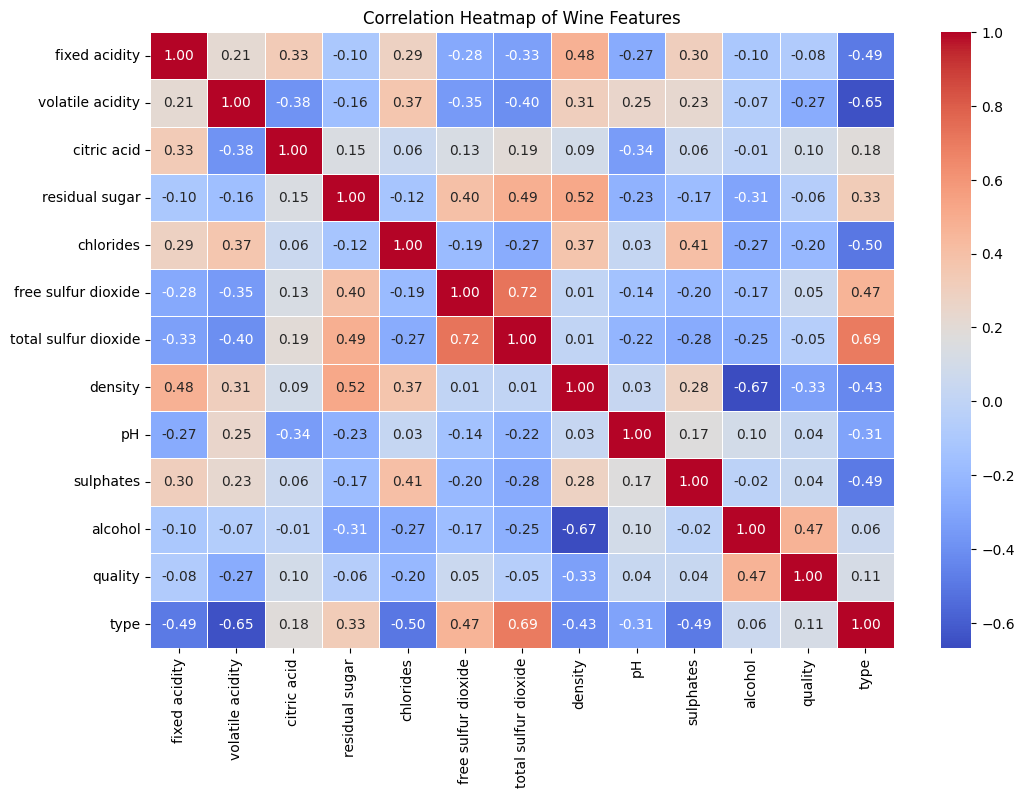

In [137]:
# Step 1: Create the correlation matrix
corr_matrix = wine_df_clean.corr(numeric_only=True)

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 8))  # Bigger figure
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wine Features")
plt.show()

Example interpretation
From a typical red/white wine dataset, you might see:

Feature	Correlation with Quality
alcohol	+0.48 → moderately positive influence
volatile acidity	-0.39 → more acidity = worse quality
citric acid	+0.08 → small effect
residual sugar	~0.0 → no strong influence
density	-0.17 → slightly negative

This tells you that:

Alcohol improves quality

Too much volatile acidity reduces it

Residual sugar might not matter much for perceived quality (surprising!)